In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define parameters
Ls = 80e-6  # Transformer leakage inductor
C2 = 100e-6  # DC Output Link Capacitance
R_load = 15  # Load resistance
R_T = 0.085  # AC Inductor Resistance
Vi = 100  # DC Input Voltage
n = 1  # Transformer Turns Ratio
f = 20000  # Switching Frequency
T = 1/f  # Period
T_hs = T / 2  # Half period

D1 = 0.2212  # Duty cycle for primary side
D2 = 0.2212  # Duty cycle for secondary side
D_phi = 0.3957  # Phase shift between primary and secondary

# Define time step and simulation time
dt = 1e-7
t_end = 0.5  # Simulation time
t = np.arange(0, t_end, dt)  # Time vector

# Initialize primary side bridge voltage Vab
Vab = np.zeros_like(t)
# Initialize secondary side bridge voltage Vcd
Vcd = np.zeros_like(t)

# Initialize v_C2 and i_L
v_C2 = np.zeros_like(t)
i_L = np.zeros_like(t)

# Record primary side bridge voltage Vab waveform
for i in range(len(t)):
    t_mod = t[i] % T  # Get the current time point within the period
    if D1*T_hs <= t_mod < T_hs:
        Vab[i] = 1
    elif (1+D1)*T_hs <= t_mod < T:
        Vab[i] = -1

    if (D1+D_phi)*T_hs <= t_mod < (D1+D_phi+1-D2)*T_hs:
        Vcd[i] = 1
    elif (t_mod < (D1+D_phi-D2)*T_hs or ((1+D1+D_phi)*T_hs <= t_mod < T)):
        Vcd[i] = -1

    # 4th order Runge-Kutta method for v_C2 and i_L
    if i > 1:
        k1_vC2 = (n * Vcd[i-1] * i_L[i-1] - v_C2[i-1] / R_load) / C2
        k1_iL = (Vab[i-1] * Vi - n * Vcd[i-1] * v_C2[i-1] - R_T * i_L[i-1]) / Ls

        k2_vC2 = (n * Vcd[i-1] * (i_L[i-1] + k1_iL * dt / 2) - (v_C2[i-1] + k1_vC2 * dt / 2) / R_load) / C2
        k2_iL = (Vab[i-1] * Vi - n * Vcd[i-1] * (v_C2[i-1] + k1_vC2 * dt / 2) - R_T * (i_L[i-1] + k1_iL * dt / 2)) / Ls

        k3_vC2 = (n * Vcd[i-1] * (i_L[i-1] + k2_iL * dt / 2) - (v_C2[i-1] + k2_vC2 * dt / 2) / R_load) / C2
        k3_iL = (Vab[i-1] * Vi - n * Vcd[i-1] * (v_C2[i-1] + k2_vC2 * dt / 2) - R_T * (i_L[i-1] + k2_iL * dt / 2)) / Ls

        k4_vC2 = (n * Vcd[i-1] * (i_L[i-1] + k3_iL * dt) - (v_C2[i-1] + k3_vC2 * dt) / R_load) / C2
        k4_iL = (Vab[i-1] * Vi - n * Vcd[i-1] * (v_C2[i-1] + k3_vC2 * dt) - R_T * (i_L[i-1] + k3_iL * dt)) / Ls

        v_C2[i] = v_C2[i-1] + (k1_vC2 + 2 * k2_vC2 + 2 * k3_vC2 + k4_vC2) * dt / 6
        i_L[i] = i_L[i-1] + (k1_iL + 2 * k2_iL + 2 * k3_iL + k4_iL) * dt / 6

tp = np.arange(1, len(t)//2+1)


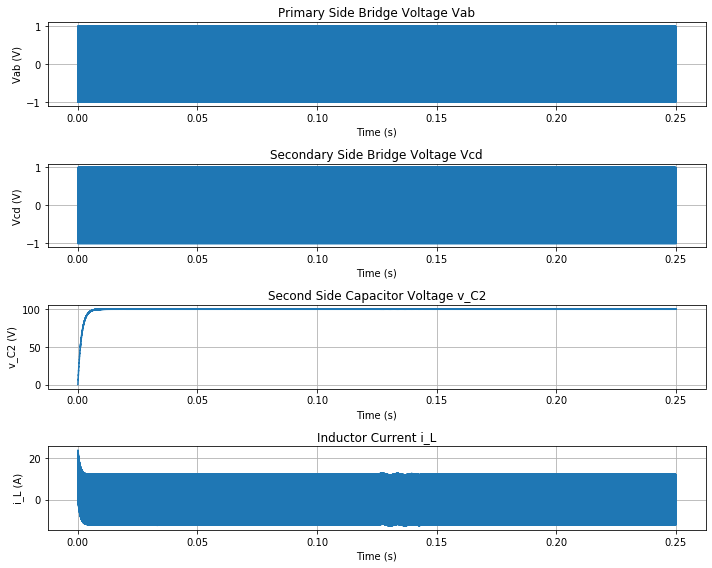

In [4]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(t[tp], Vab[tp])
plt.xlabel('Time (s)')
plt.ylabel('Vab (V)')
plt.title('Primary Side Bridge Voltage Vab')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t[tp], Vcd[tp])
plt.xlabel('Time (s)')
plt.ylabel('Vcd (V)')
plt.title('Secondary Side Bridge Voltage Vcd')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t[tp], v_C2[tp])
plt.xlabel('Time (s)')
plt.ylabel('v_C2 (V)')
plt.title('Second Side Capacitor Voltage v_C2')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t[tp], i_L[tp])
plt.xlabel('Time (s)')
plt.ylabel('i_L (A)')
plt.title('Inductor Current i_L')
plt.grid(True)

plt.tight_layout()
plt.show()

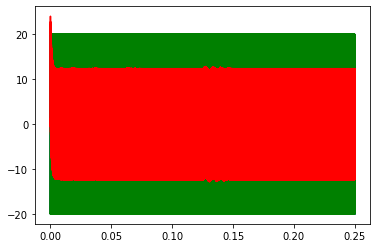

In [5]:

plt.figure()
plt.plot(t[tp], Vab[tp]*20, 'b', t[tp], Vcd[tp]*20, 'g', t[tp], i_L[tp], 'r')
plt.show()

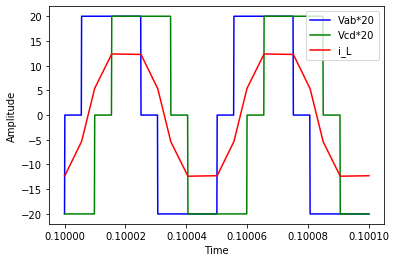

In [7]:
# Create a new index array to show local details
tp_new = range(1000000,1001000)

# Plot the graph
plt.figure()
plt.plot(t[tp_new], Vab[tp_new]*20, 'b', label='Vab*20')
plt.plot(t[tp_new], Vcd[tp_new]*20, 'g', label='Vcd*20')
plt.plot(t[tp_new], i_L[tp_new], 'r', label='i_L')

# Add legend and labels
plt.legend()
plt.xlabel('Time')  # 时间
plt.ylabel('Amplitude')  # 幅值

# Show the plot
plt.show()